<a href="https://colab.research.google.com/github/brepowell/ML-Contest-Series/blob/main/MLSeriesSupervisedLearningTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Breanna Powell

CSS 539

# To run:
Use an IDE that will allow you to open a Jupyter Notebook.

For example, use Anaconda Navigator to open Visual Studio Code.

You may need to select a kernel to run the program.

I used base(Python 3.10.9)

## Import Libraries

In [12]:
import pandas as pd
import matplotlib as plt

# These libraries are supposed to accelerate some operations
import numexpr
import bottleneck
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

## Data Information

From:
https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households

More Info:
https://innovation.ukpowernetworks.co.uk/projects/low-carbon-london

"Created 9 years ago, updated 2 years ago
Energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014.

Readings were taken at half hourly intervals. The customers in the trial were recruited as a balanced sample representative of the Greater London population.

The dataset contains energy consumption, in kWh (per half hour), unique household identifier, date and time. The CSV file is around 10GB when unzipped and contains around 167million rows.

Within the data set are two groups of customers. The first is a sub-group, of approximately 1100 customers, who were subjected to Dynamic Time of Use (dToU) energy prices throughout the 2013 calendar year period. The tariff prices were given a day ahead via the Smart Meter IHD (In Home Display) or text message to mobile phone. Customers were issued High (67.20p/kWh), Low (3.99p/kWh) or normal (11.76p/kWh) price signals and the times of day these applied. The dates/times and the price signal schedule is availaible as part of this dataset. All non-Time of Use customers were on a flat rate tariff of 14.228pence/kWh.

The signals given were designed to be representative of the types of signal that may be used in the future to manage both high renewable generation (supply following) operation and also test the potential to use high price signals to reduce stress on local distribution grids during periods of stress.

The remaining sample of approximately 4500 customers energy consumption readings were not subject to the dToU tariff."


In [13]:
import pandas as pd
path = "Data/pickles/"
test_df = pd.read_pickle(path + "data_test.pkl")

In [14]:
zeroPower = test_df[test_df['energy(kWh/hh)'] == 0]



In [15]:
# https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-multiple-columns-in-python/

import pandas as pd
zeroPower['datetime'] = pd.to_datetime(zeroPower[['year', 'month', 'day', 'hour', 'minute']])
zeroPower = zeroPower.drop(columns=['year', 'month', 'day', 'hour', 'minute'])


C:\Users\brely\AppData\Local\Temp\ipykernel_48984\2321891396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeroPower['datetime'] = pd.to_datetime(zeroPower[['year', 'month', 'day', 'hour', 'minute']])


In [26]:
sorted_zeroPower = zeroPower.groupby("datetime").count()

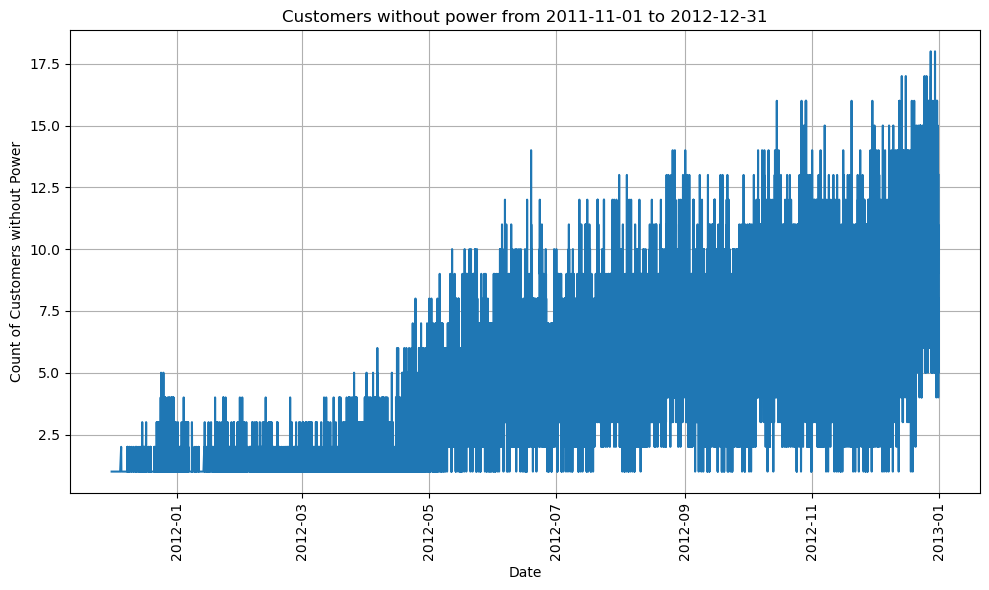

In [25]:
import matplotlib.pyplot as plt

def plotOutages(start_date, end_date, title):
    # Filter the DataFrame to include only the rows within the specified date range
    subset_data = sorted_zeroPower[start_date:end_date]

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(subset_data.index, subset_data['energy(kWh/hh)'])
    plt.xlabel('Date')
    plt.ylabel('Count of Customers without Power')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

start_date = '2011-11-01'
end_date = '2012-12-31'
title = 'Customers without power from {} to {}'.format(start_date, end_date)
plotOutages(start_date, end_date, title)

# Kalman Filter


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numexpr
import bottleneck

path = "Data/pickles/"
train_df = pd.read_pickle(path + "data_norm_training.pkl")
val_df = pd.read_pickle(path + "data_norm_validation.pkl")
test_df = pd.read_pickle(path + "data_norm_test.pkl")

import pickle
with open('indeces.pkl', 'rb') as f:
    column_indices = pickle.load(f)

In [27]:
# https://www.tensorflow.org/probability/install
# https://www.tensorflow.org/probability/api_docs/python/tfp/experimental/sequential/extended_kalman_filter


# import tensorflow as tf
# import tensorflow_probability as tfp

# observations a (structure of) Tensors,
#     each of shape concat([[num_timesteps, b1, ..., bN], [event_size]]) with scalar 
#     event_size and optional batch dimensions b1, ..., bN.
# initial_state_prior a tfd.Distribution instance (typically MultivariateNormal) 
#     with event_shape equal to state_size and an optional batch_shape of [b1, ..., bN], representing the prior over the state.
# transition_fn	a Python callable that accepts (batched) vectors of length state_size, and returns a tfd.Distribution instance, typically a MultivariateNormal, representing the state transition and covariance.
# observation_fn	a Python callable that accepts a (batched) vector of length state_size and returns a tfd.Distribution instance, typically a MultivariateNormal representing the observation model and covariance.
# transition_jacobian_fn	a Python callable that accepts a (batched) vector of length state_size and returns a (batched) matrix of shape [state_size, state_size], representing the Jacobian of transition_fn.
# observation_jacobian_fn	a Python callable that accepts a (batched) vector of length state_size and returns a (batched) matrix of size [state_size, event_size], representing the Jacobian of observation_fn.
# name	Python str name for ops created by this method. Default value: None (i.e., 'extended_kalman_filter').

# tfp.experimental.sequential.extended_kalman_filter(
#     observations,
#     initial_state_prior,
#     transition_fn,
#     observation_fn,
#     transition_jacobian_fn,
#     observation_jacobian_fn,
#     name=None
# )